# Inlämningsuppgift: Del 2 - Adversarial input attack

Förnamn Efternamn \
akronym@student.bth.se

Förnamn Efternamn \
akronym@student.bth.se

# Instruktioner

Ändra notebookens platshållare så som era namn- och mailuppgifter samt instruktioner i de olika avsnitten. 

Notebookens underrubriker på nivå 3 (###) är bara ett enkelt exempel på hur er implementation kan delas upp. Ni bör skapa egna rubriker anpassade efter er implementation men lämna alla nivå 1 (#) och 2-rubriker (##) som de är. En viktig del inom data-science är att kunna presentera sina metoder och resultat på ett tydligt sätt. **En ostrukturerad och otydlig notebook kan påverka betygsättningen.**

Notera att t.ex. hyperparameter-tuning och annan optimisering för prestanda inte är nödvändigt i denna uppgift. Så länge modellen fungerar märkvärt bättre än ett "coin flip" så räcker det att ni väljer era hyperparametrar manuellt.

# Uppgiften

Uppgiften går ut på att göra så att bilden på koalan nedan klassificeras som en traktor istället. Givetvis ska bilden på koalan se helt oförändrad ut för det mänskliga ögat då attacken är genomförd. Nedan följer Pythonkod som läser in de båda bilderna som uppgiften bygger på samt läser in en ResNet50-modell som klassiciferar bilderna. Saknar ni några Python-paket, t.ex. TensorFlow så installera dem med en pakethanterarare, t.ex. pip

## Beskrivning av adversarial input attacker

Börja med att förklara vad denna typ av attacker är och hur de fungerar i rapportens sektion 2.1.

## Nedan följer kod för att läsa in bilderna och klassificera dem med ResNet50 modellen

In [18]:
from matplotlib import pyplot as plt
import numpy as np

import tensorflow as tf
import keras
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image

from art.estimators.classification import KerasClassifier
from art.attacks.evasion import BoundaryAttack
from art.utils import to_categorical

tf.compat.v1.disable_eager_execution()

print(f"TensorFlow: {tf.__version__}")

TensorFlow: 2.10.0


In [19]:
# Loads the pretrained ResNet50 model
model = ResNet50(weights='imagenet')

In [20]:
# Load the two images (koala & tractor)

init_image = image.load_img("images/koala1.jpeg", target_size=(224, 224))
init_image = image.img_to_array(init_image)

target_image = image.load_img("images/tractor.jpeg", target_size=(224, 224))
target_image = image.img_to_array(target_image)

class_lookup = {105: "koala", 866: "tractor"}

c:\Users\tobbe\Documents\BTH\Ai-scurety\Security-in-AI-systems\.venv\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Init image class label: 105 (koala)


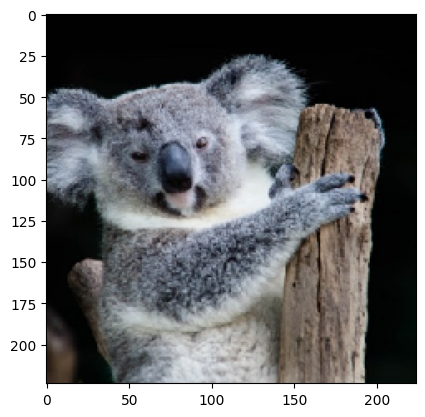

Target image class label: 866 (tractor)


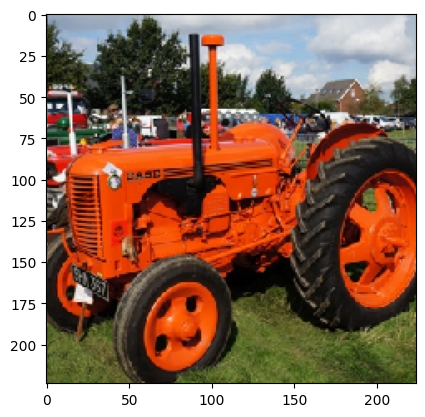

In [21]:
init_class_id = np.argmax(model.predict(np.array([init_image])))
print(f"Init image class label: {init_class_id} ({class_lookup[init_class_id]})")
plt.imshow(init_image.astype(np.uint))
plt.show()

target_class_id = np.argmax(model.predict(np.array([target_image])))
print(f"Target image class label: {target_class_id} ({class_lookup[target_class_id]})")
plt.imshow(target_image.astype(np.uint))
plt.show()

## Implementation av er attack

Beskriv i er rapport vad just er valda attack kallas och i detalj hur den fungerar (sektion 2.2 i rapporten). Beskriv även kort vilka bibliotek ni använder för att implementera den.

## Er kod för attacken

I cellerna nedan lägger ni in er egen kod för att genomföra attacken.

### Bibliotek

In [22]:
# Samla era import statements här e.g.
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# ...
import cv2 as cv
import os


### Egna funktioner

In [6]:
# Samla era egna funktioner relaterade till attacken här
# Funktionerna ska kort beskrivas med docstrings och kommentarer så att man förstår syftet och implementationen
# Blir det många bör ni bryta ut dessa i en separat fil


### Förberedelser

### Modellering

In [23]:
# E.g. träning, Använder en generell modell som en wrapper för att kunna använda ART
classifier = KerasClassifier(model=model,clip_values=(0, 255))


### Attack

Attacken är en Boundery Attack, det genereras adverseriella bilder som missklassifierar koala som traktor. Här genereras även två till bilder på fler koalor för att använda vid skyddsmekanismen.

Input image:  images/koala1.jpeg


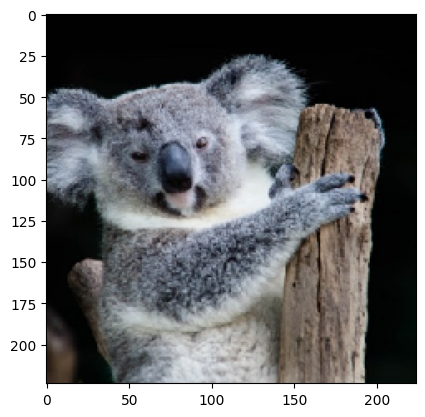

Iteration:  0  L2:  44266.117 Class ID:  105


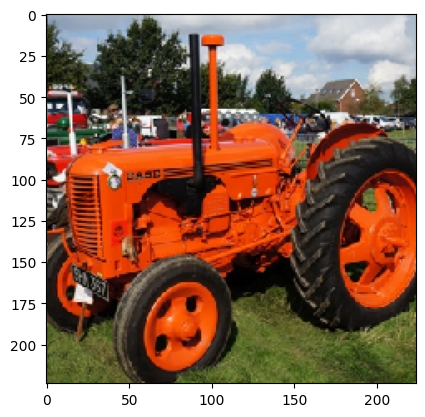

Boundary attack: 100%|██████████| 1/1 [19:03<00:00, 1143.77s/it]


Iteration:  1000  L2:  8891.586 Class ID:  866


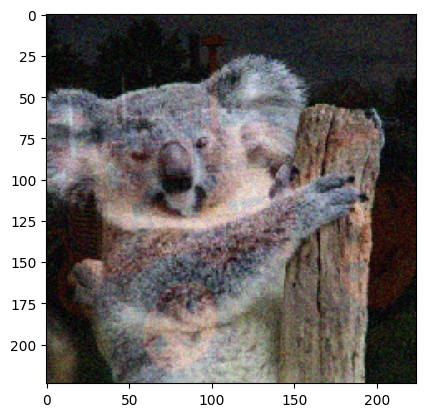

Boundary attack: 100%|██████████| 1/1 [19:02<00:00, 1142.84s/it]

Iteration:  2000  L2:  5791.1074 Class ID:  866


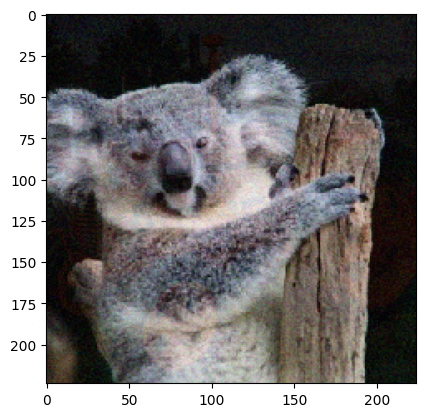

Boundary attack: 100%|██████████| 1/1 [17:41<00:00, 1061.81s/it]


Iteration:  3000  L2:  4023.169 Class ID:  866


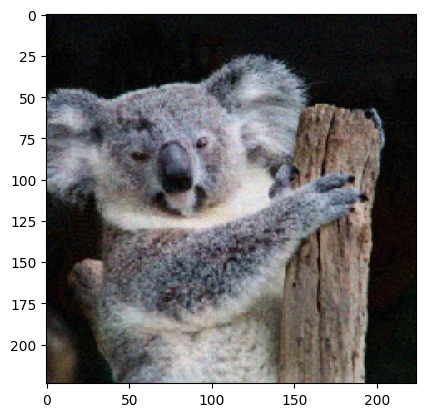

Boundary attack: 100%|██████████| 1/1 [17:48<00:00, 1068.68s/it]


Iteration:  4000  L2:  2799.6475 Class ID:  866


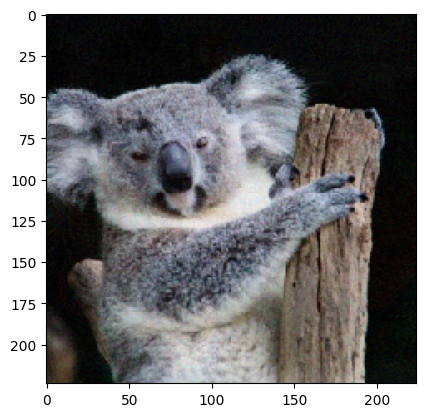

Boundary attack: 100%|██████████| 1/1 [16:37<00:00, 997.64s/it]


Iteration:  5000  L2:  2071.532 Class ID:  866


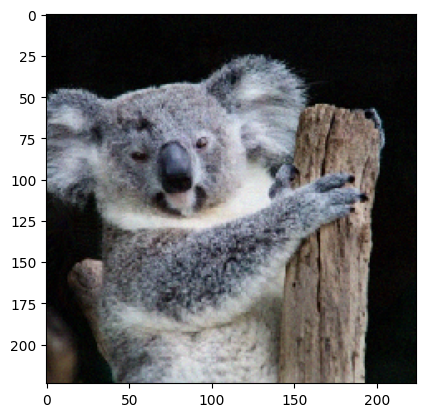

In [ ]:
# Attackutförande -
attack = BoundaryAttack(estimator=classifier, targeted=True, max_iter=1000)

name = "images/koala1.jpeg"
print("Input image: ", name)
input_image = image.load_img(name, target_size=(224, 224))
input_image = image.img_to_array(input_image)

#Imagenet har 1000 classer enligt https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/
Y = to_categorical([target_class_id], 1000)
x_adv = np.array([target_image])
X = np.array([input_image])

plt.imshow(input_image.astype(np.uint))
plt.show()

#Beräknar euclidisk distans mellan bilderna
print("Iteration: ", 0," L2: ",np.linalg.norm(target_image - input_image), "Class ID: ",init_class_id)
plt.imshow(target_image.astype(np.uint))
plt.show()

#Kör 10 iterationer för att kunna plotta progressionen av attacken visuellt
for i in range(5):
    x_adv = attack.generate(X, Y,x_adv_init=x_adv)

    init_class_id = np.argmax(model.predict(np.array([x_adv[0]])))
    print("Iteration: ", (i+1)*1000," L2: ",np.linalg.norm(x_adv - input_image), "Class ID: ",init_class_id)
    adv = x_adv[0].astype(np.uint)
    plt.imshow(adv)
    plt.show()

#Spara den adversiala bilden genom att normalisera den och spara den som en png för att inte tappa information
x_adv_normalized = 255 * (x_adv[0] - np.min(x_adv[0])) / (np.max(x_adv[0]) - np.min(x_adv[0]))
x_adv_normalized = x_adv_normalized.astype(np.uint8)
plt.imsave("images/adversial_koala1.png", x_adv_normalized)


### Attackresultat

Summera och förklara era attackresultat i flytande text här

Init image class label: 866 (tractor)


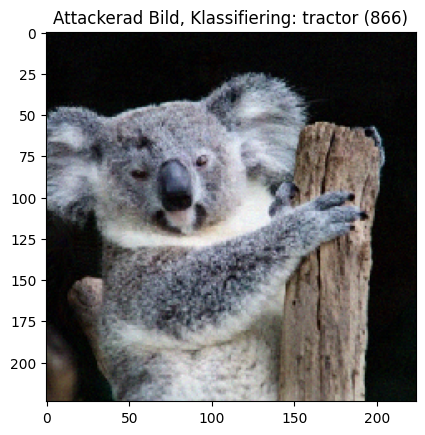

Init image class label: 105 (koala)


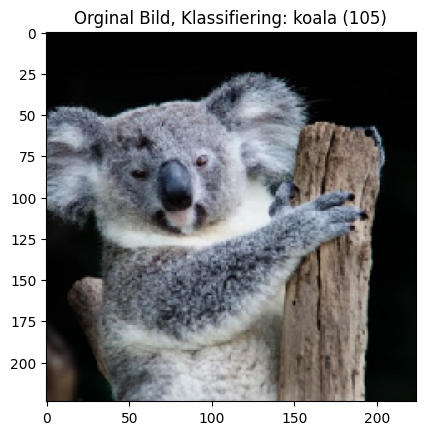

In [32]:
# Presentera attackens resultat m.h.a. kod här
#Läser in bilden för att spara resuser om man startar om kernellen
adv_image = image.load_img("images/adversial_koala1.png", target_size=(224, 224))
adv_image = image.img_to_array(adv_image)


init_class_id = np.argmax(model.predict(np.array([x_adv[0]])))
print(f"Init image class label: {init_class_id} ({class_lookup[init_class_id]})")
plt.imshow(adv_image.astype(np.uint))
plt.title(f"Attackerad Bild, Klassifiering: {class_lookup[init_class_id]} ({init_class_id})")
plt.show()

#Orginalbild
init_class_id = np.argmax(model.predict(np.array([init_image])))
print(f"Init image class label: {init_class_id} ({class_lookup[init_class_id]})")
plt.imshow(init_image.astype(np.uint))
plt.title(f"Orginal Bild, Klassifiering: {class_lookup[init_class_id]} ({init_class_id})")
plt.show()




## Skyddsåtgärder

Beskriv (i rapportens sektion 2.3) vilka säkerhetsåtgärd(er) ni valt som lämpliga för att skydda mot er attack. Motivera varför ni valt just de(n) metod(erna).

## Implementation av skyddsåtgärder (frivilligt endast för A eller B)

Nedan fyller ni i er kod som implementerar skyddsmekanismen mot er attackmetod. Skriv även en summering av vad skyddsresultatet blev när ni implementerade metoden (beskriv detta i rapportens del 2.4).

### Egna funktioner

In [33]:
# Samla era egna funktioner relaterade till säkerhetsåtgärden här
# Funktionerna ska kort beskrivas med docstrings och kommentarer så att man förstår syftet och implementationen
# Blir det många bör ni bryta ut dessa i en separat fil

def jpeg_compress(image, quality=95):
    '''Komprimerar en bild med jpeg och returnerar den komprimerade bilden'''
    encode_param = [int(cv.IMWRITE_JPEG_QUALITY), quality]
    _, encimg = cv.imencode('.jpg', image, encode_param)
    decimg = cv.imdecode(encimg, 1)
    return decimg

def is_adversarial(image):
    '''Kollar om en bild är adversarial genom att komprimera den och jämföra med orginalbilden med euclidisk distans'''
    compressed = jpeg_compress(image, quality=99)
    l2 = np.linalg.norm(image - compressed)
    if l2 > 600:
        return True, l2
    else:
        return False, l2

def safe_predict(model, image):
    ''''Metod för att förhindra att adversariala bilder används för att förutsäga klasser, vid detektion så avbryts predictionen'''
    is_adv, l2 = is_adversarial(image)
    if is_adv:
        return "Adversarial image detected, Prediction aborted"
    else:
        return np.argmax(model.predict((np.array([image]))))



### Förberedelser

Input image:  images/koala2.jpeg


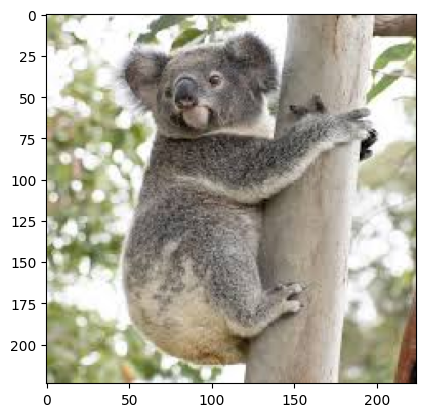

Iteration:  0  L2:  43747.76 Class ID:  105


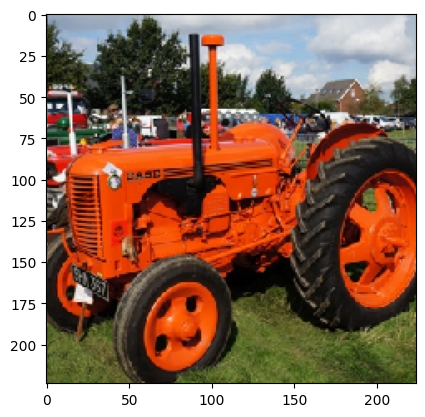

Boundary attack: 100%|██████████| 1/1 [20:57<00:00, 1257.63s/it]

Iteration:  1000  L2:  4260.6553 Class ID:  866


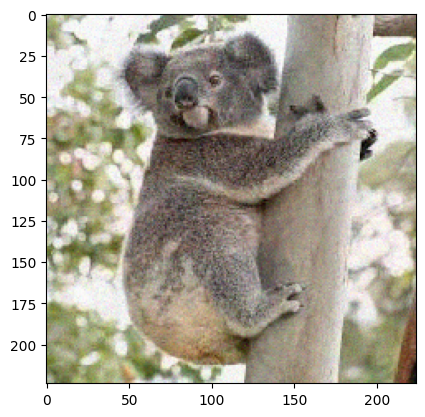

Boundary attack: 100%|██████████| 1/1 [19:26<00:00, 1166.18s/it]

Iteration:  2000  L2:  2279.1123 Class ID:  866


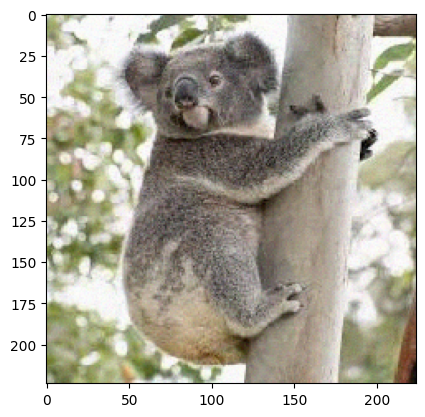

Boundary attack: 100%|██████████| 1/1 [17:05<00:00, 1025.34s/it]

Iteration:  3000  L2:  1620.9697 Class ID:  866


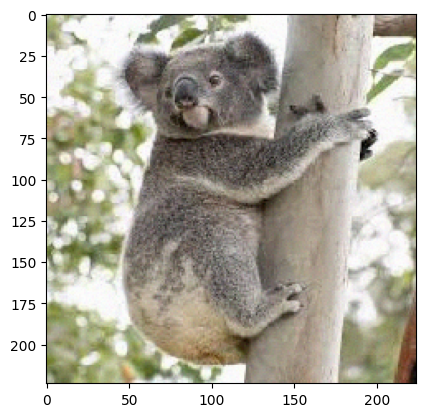

Boundary attack: 100%|██████████| 1/1 [17:18<00:00, 1038.27s/it]


Iteration:  4000  L2:  1254.3237 Class ID:  866


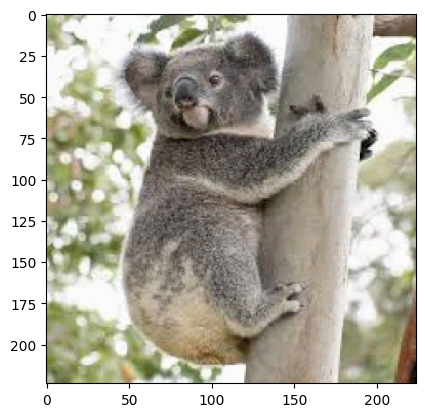

Boundary attack: 100%|██████████| 1/1 [17:28<00:00, 1048.15s/it]

Iteration:  5000  L2:  1047.491 Class ID:  866


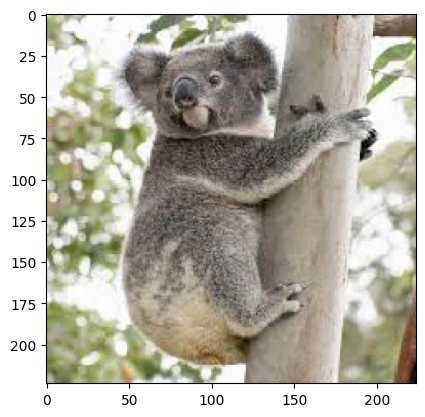

Input image:  images/koala3.jpeg


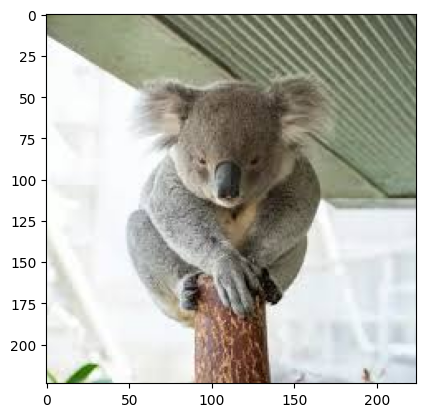

Iteration:  0  L2:  52504.98 Class ID:  866


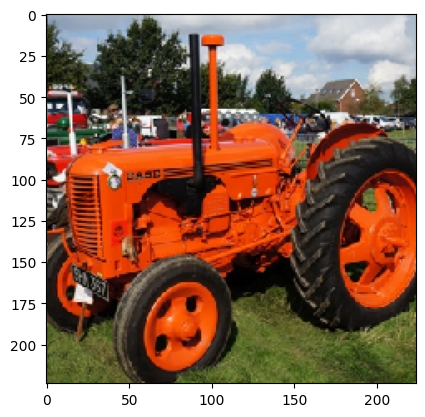

Boundary attack: 100%|██████████| 1/1 [17:39<00:00, 1059.04s/it]

Iteration:  1000  L2:  7843.6724 Class ID:  866


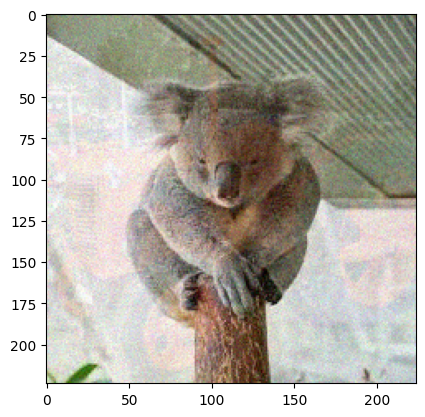

Boundary attack: 100%|██████████| 1/1 [18:15<00:00, 1095.83s/it]

Iteration:  2000  L2:  4494.6626 Class ID:  866


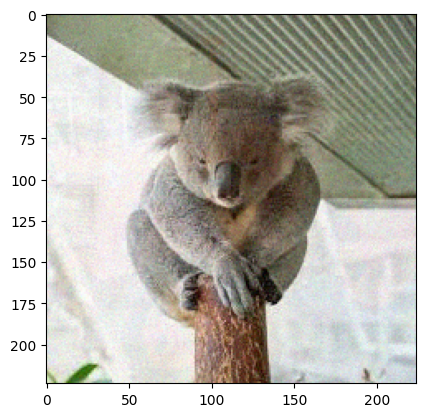

Boundary attack: 100%|██████████| 1/1 [19:37<00:00, 1177.67s/it]


Iteration:  3000  L2:  3195.018 Class ID:  866


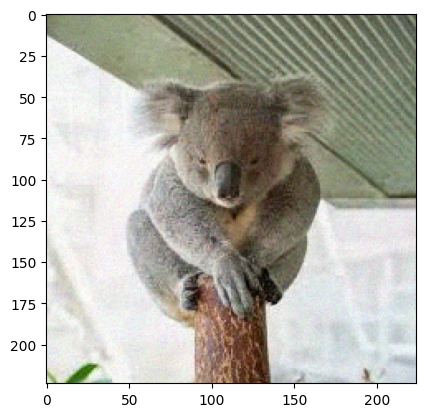

Boundary attack: 100%|██████████| 1/1 [19:33<00:00, 1173.25s/it]


Iteration:  4000  L2:  2443.4336 Class ID:  866


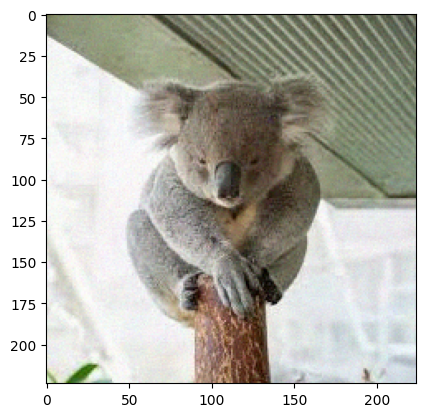

Boundary attack: 100%|██████████| 1/1 [19:38<00:00, 1178.01s/it]


Iteration:  5000  L2:  1967.0879 Class ID:  866


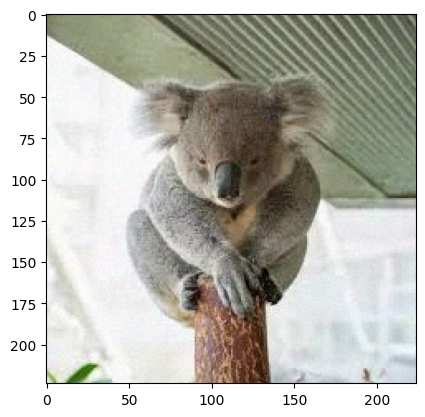

In [34]:
# Genererar två adversiala bilder till för att testa säkerhetsåtgärden och styrka dess resultat
attack = BoundaryAttack(estimator=classifier, targeted=True, max_iter=1000)

koala_images = []
for index in range(2,4):
    name = "images/koala"+str(index)+".jpeg"
    print("Input image: ", name)
    input_image = image.load_img(name, target_size=(224, 224))
    input_image = image.img_to_array(input_image)

    #Imagenet har 1000 classer enligt https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/
    Y = to_categorical([target_class_id], 1000)
    x_adv = np.array([target_image])
    X = np.array([input_image])

    plt.imshow(input_image.astype(np.uint))
    plt.show()

    #Beräknar euclidisk distans mellan bilderna
    print("Iteration: ", 0," L2: ",np.linalg.norm(target_image - input_image), "Class ID: ",init_class_id)
    plt.imshow(target_image.astype(np.uint))
    plt.show()

    #Kör 10 iterationer för att kunna plotta progressionen av attacken visuellt
    for i in range(5):
        x_adv = attack.generate(X, Y,x_adv_init=x_adv)

        init_class_id = np.argmax(model.predict(np.array([x_adv[0]])))
        print("Iteration: ", (i+1)*1000," L2: ",np.linalg.norm(x_adv - input_image), "Class ID: ",init_class_id)
        adv = x_adv[0].astype(np.uint)
        plt.imshow(adv)
        plt.show()

    #Spara den adversiala bilden genom att normalisera den och spara den som en png för att inte tappa information
    x_adv_normalized = 255 * (x_adv[0] - np.min(x_adv[0])) / (np.max(x_adv[0]) - np.min(x_adv[0]))
    x_adv_normalized = x_adv_normalized.astype(np.uint8)
    plt.imsave("images/adversial_koala"+str(index)+".png", x_adv_normalized)


### Skydd

Beskriv säkerhetsåtgärden kortfattat här

In [ ]:
# Implementation av skyddsåtgärd
#Testar att köra safe_predict på ren bild
clean_image = image.load_img("images/koala1.jpeg", target_size=(224, 224))
clean_image = image.img_to_array(clean_image)
print("Result from defence mechanic: ", safe_predict(model, clean_image))

#Testar att köra safe_predict på adversarial bild
adv_image = image.load_img("images/adv_koala1.png", target_size=(224, 224))
adv_image = image.img_to_array(adv_image)
print("Result from defence mechanic: ", safe_predict(model, adv_image))

Result from defence mechanic:  105
Result from defence mechanic:  Adversarial image detected, Prediction aborted


### Skyddsresultat

Bevisa och förklara era skyddsresultat i flytande text här

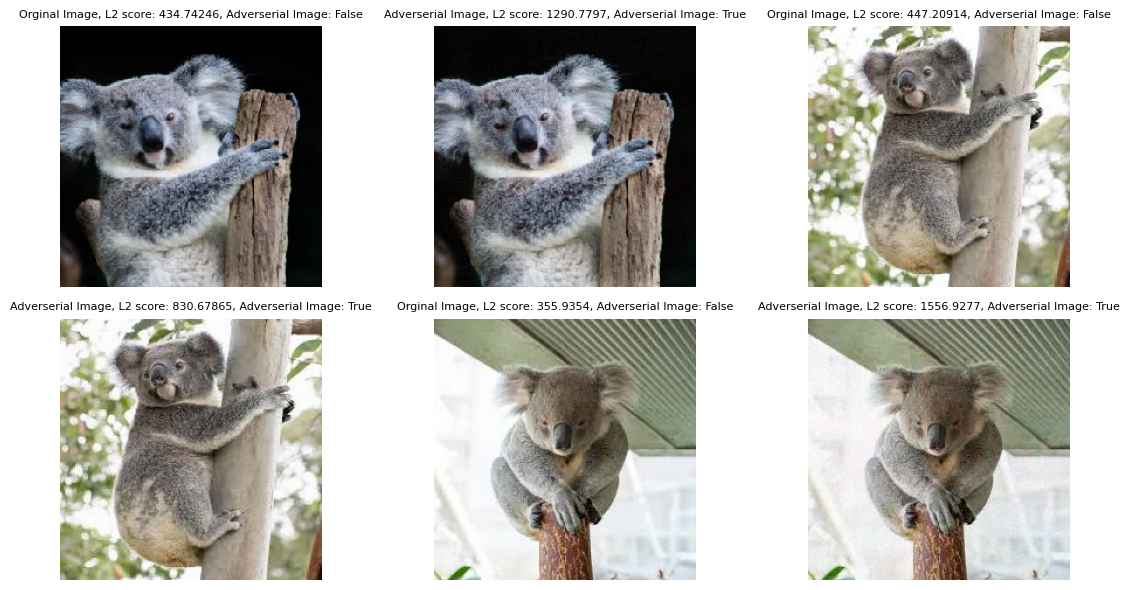

In [31]:
# Presentera skyddåtgärdens resultat m.h.a. kod här
#ladda alla bilder adverserial och orginal i en lista
array_of_images = []
for index in range(1,4):
    tmp_image = image.load_img("images/koala"+str(index)+".jpeg", target_size=(224, 224))
    tmp_image = image.img_to_array(tmp_image)
    array_of_images.append(tmp_image)

    tmp_image = image.load_img("images/adv_koala"+str(index)+".png", target_size=(224, 224))
    tmp_image = image.img_to_array(tmp_image)
    array_of_images.append(tmp_image)


fig, axs = plt.subplots(2, 3, figsize=(12, 6))

# loopa över alla bilder och plotta dem
for i, ax in enumerate(axs.flat):

    # Skriv ut om bilden är orginal eller adverserial
    if i%2 == 0:
        attacked = "Orginal Image"
    else:
        attacked = "Adverserial Image"

    #Kör bilden genom adverseriell detektion
    adverserial, l2 = is_adversarial(array_of_images[i])

    ax.imshow(array_of_images[i].astype(np.uint))
    ax.set_title(attacked+", L2 score: "+str(l2)+", Adverserial Image: "+str(adverserial), fontsize=8)
    ax.axis("off")

# Visa plotten
fig.tight_layout()
plt.show()


# Referenser

Lista era referenser här. E.g. var ni hittat information om attacken, skyddsåtgärder eller bibliotekets dokumentation/repository.